In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
train = pd.read_csv('D:\mobile-price-classification/train.csv')
test = pd.read_csv('D:\mobile-price-classification/test.csv')

In [4]:
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [6]:
train.shape

(2000, 21)

In [7]:
a = train.isnull().values.any()
b = test.isnull().values.any()
print("Train :",a," Test : ",b)

Train : False  Test :  False


In [8]:
train = train.rename(columns = {'pc':'RearCamera', 'fc':'FrontCamera', 'sc_h':'ScreenHight',
                                'sc_w':'ScreenWidth','m_dep':'MobileDepth','px_width':'PixelWidth',
                                'ram':'Ram','int_memory':'Rom','four_g':'4G',
                                'three_g': '3G','dual_sim':'DualSim','battery_power':'BatteryPower','touch_screen':'TouchScreen',
                                'clock_speed':'ClockSpeed','n_cores':'Core','wifi':'WiFi','talk_time':'TalkTime',
                                'price_range':'PriceRange','blue':'Bluetooth','px_height':'PixelHieght','mobile_wt':'MobileWeight'})

In [9]:
test = test.rename(columns = {'id':'ID','pc':'RearCamera', 'fc':'FrontCamera', 'sc_h':'ScreenHight',
                                'sc_w':'ScreenWidth','m_dep':'MobileDepth','px_width':'PixelWidth',
                                'ram':'Ram','int_memory':'Rom','four_g':'4G',
                                'three_g': '3G','dual_sim':'DualSim','battery_power':'BatteryPower','touch_screen':'TouchScreen',
                                'clock_speed':'ClockSpeed','n_cores':'Core','wifi':'WiFi','talk_time':'TalkTime',
                                'price_range':'PriceRange','blue':'Bluetooth','px_height':'PixelHieght','mobile_wt':'MobileWeight'})

In [10]:
train.dtypes

BatteryPower      int64
Bluetooth         int64
ClockSpeed      float64
DualSim           int64
FrontCamera       int64
4G                int64
Rom               int64
MobileDepth     float64
MobileWeight      int64
Core              int64
RearCamera        int64
PixelHieght       int64
PixelWidth        int64
Ram               int64
ScreenHight       int64
ScreenWidth       int64
TalkTime          int64
3G                int64
TouchScreen       int64
WiFi              int64
PriceRange        int64
dtype: object

In [11]:
train.head()

,BatteryPower,Bluetooth,ClockSpeed,DualSim,FrontCamera,4G,Rom,MobileDepth,MobileWeight,Core,...,PixelHieght,PixelWidth,Ram,ScreenHight,ScreenWidth,TalkTime,3G,TouchScreen,WiFi,PriceRange
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [12]:
PriceRangeRate = train.PriceRange.value_counts()/len(train)
print(PriceRangeRate)

3    0.25
2    0.25
1    0.25
0    0.25
Name: PriceRange, dtype: float64


In [13]:
PriceRange_Group = train.groupby('PriceRange')
PriceRange_Group.mean()

,BatteryPower,Bluetooth,ClockSpeed,DualSim,FrontCamera,4G,Rom,MobileDepth,MobileWeight,Core,RearCamera,PixelHieght,PixelWidth,Ram,ScreenHight,ScreenWidth,TalkTime,3G,TouchScreen,WiFi
PriceRange,,,,,,,,,,,,,,,,,,,,
0,1116.902,0.486,1.5502,0.500,4.084,0.518,31.174,0.4902,140.552,4.600,9.574,536.408,1150.270,785.314,12.324,5.682,10.612,0.746,0.524,0.496
1,1228.868,0.490,1.4886,0.510,4.340,0.524,32.116,0.5240,140.510,4.298,9.924,666.892,1251.908,1679.490,12.212,5.544,11.362,0.756,0.522,0.504
2,1228.320,0.486,1.5298,0.498,4.498,0.494,30.920,0.4908,143.614,4.682,10.018,632.284,1234.046,2582.816,12.010,5.714,10.972,0.774,0.470,0.504
3,1379.984,0.518,1.5204,0.530,4.316,0.550,33.976,0.5020,136.320,4.502,10.150,744.848,1369.838,3449.232,12.680,6.128,11.098,0.770,0.496,0.524


In [14]:
first = train['PriceRange']
train.drop(labels=['PriceRange'], axis=1,inplace = True)
train.insert(0, 'PriceRange', first)

,PriceRange,BatteryPower,Bluetooth,ClockSpeed,DualSim,FrontCamera,4G,Rom,MobileDepth,MobileWeight,...,RearCamera,PixelHieght,PixelWidth,Ram,ScreenHight,ScreenWidth,TalkTime,3G,TouchScreen,WiFi
PriceRange,1.000000,0.200723,0.020573,-0.006606,0.017444,0.021998,0.014772,0.044435,0.000853,-0.030302,...,0.033599,0.148858,0.165818,0.917046,0.022986,0.038711,0.021859,0.023611,-0.030411,0.018785
BatteryPower,0.200723,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,...,0.031441,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343
Bluetooth,0.020573,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,...,-0.009952,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863
ClockSpeed,-0.006606,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,...,-0.005245,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471
DualSim,0.017444,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,...,-0.017143,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740
FrontCamera,0.021998,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,...,0.644595,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085
4G,0.014772,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,...,-0.005598,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620
Rom,0.044435,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,...,-0.033273,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993
MobileDepth,0.000853,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,...,0.026282,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353
MobileWeight,-0.030302,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,...,0.018844,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409


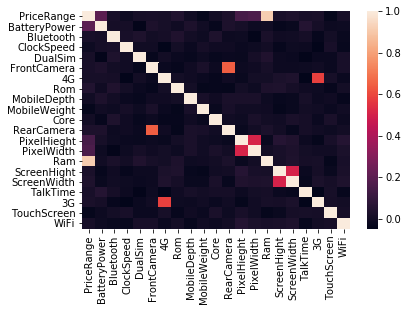

In [15]:
corr = train.corr()
corr = (corr)
sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values)
corr

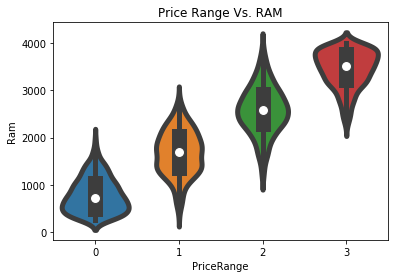

In [16]:
sns.violinplot( y=train["Ram"], x=train["PriceRange"], linewidth=5)
plt.title('Price Range Vs. RAM')
plt.show()

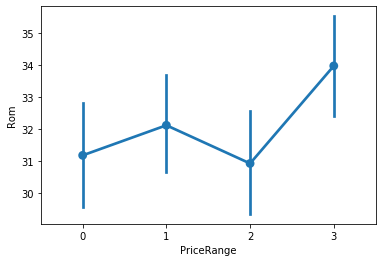

In [17]:
sns.pointplot(y = "Rom", x = "PriceRange", data = train)

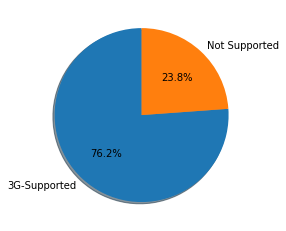

In [18]:
labels = ["3G-Supported",'Not Supported']
values=train['3G'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct = '%1.1f%%', shadow=True, startangle=90)
plt.show()

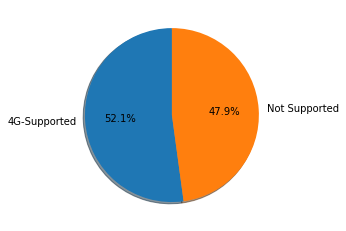

In [19]:
labels = ["4G-Supported", "Not Supported"]
values = train['4G'].value_counts().values
fig1, ax1 =plt.subplots()
ax1.pie(values, labels=labels, autopct = '%1.1f%%', shadow=True, startangle=90)
plt.show()

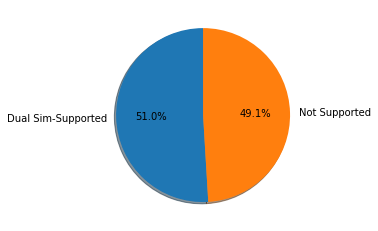

In [20]:
labels = ["Dual Sim-Supported", "Not Supported"]
values = train['DualSim'].value_counts().values
fig1, ax1 =plt.subplots()
ax1.pie(values, labels=labels, autopct = '%1.1f%%', shadow=True, startangle=90)
plt.show()

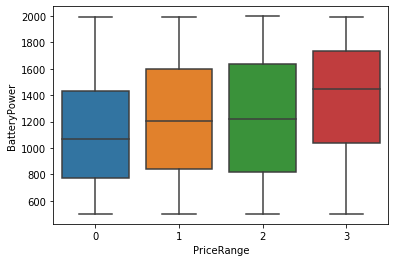

In [21]:
sns.boxplot(x="PriceRange", y="BatteryPower", data=train)

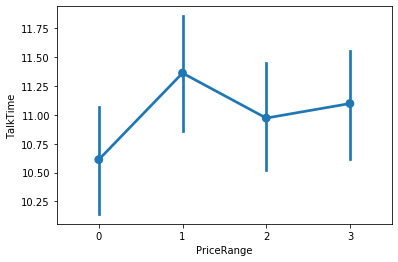

In [22]:
sns.pointplot(x='PriceRange',y='TalkTime', data = train)

Text(0.5, 0, 'MegaPixels')

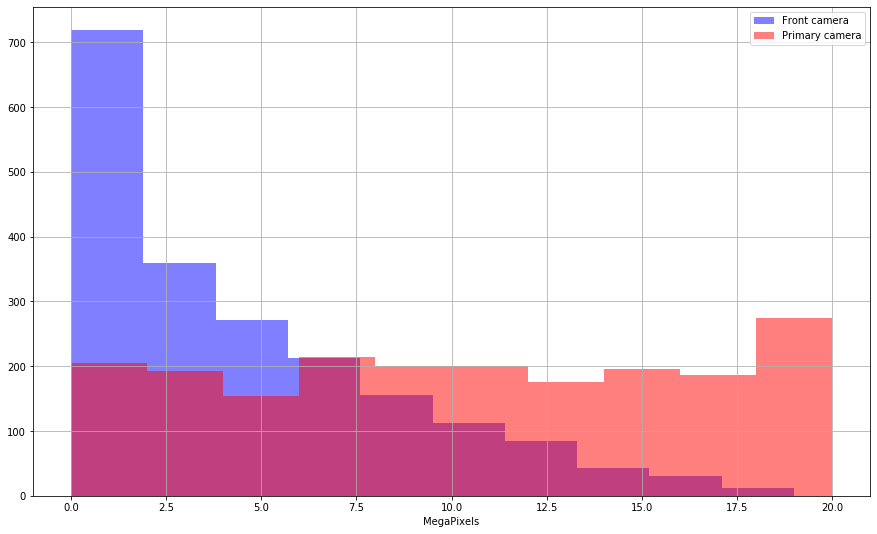

In [23]:
plt.figure(figsize=(15,9))
train['FrontCamera'].hist(alpha=0.5,color='blue',label='Front camera')
train['RearCamera'].hist(alpha=0.5,color='red',label='Primary camera')
plt.legend()
plt.xlabel('MegaPixels')

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [27]:
from sklearn.ensemble import RandomForestClassifier
rmf = RandomForestClassifier(n_estimators = 450)
rmf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=450,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [28]:
rmf.score(X_test, y_test)

0.882

In [29]:
test.head()

,ID,BatteryPower,Bluetooth,ClockSpeed,DualSim,FrontCamera,4G,Rom,MobileDepth,MobileWeight,...,RearCamera,PixelHieght,PixelWidth,Ram,ScreenHight,ScreenWidth,TalkTime,3G,TouchScreen,WiFi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [30]:
test = test.drop('ID',axis=1)

In [31]:
test.head()

,BatteryPower,Bluetooth,ClockSpeed,DualSim,FrontCamera,4G,Rom,MobileDepth,MobileWeight,Core,RearCamera,PixelHieght,PixelWidth,Ram,ScreenHight,ScreenWidth,TalkTime,3G,TouchScreen,WiFi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [32]:
predicted = rmf.predict(test)

In [33]:
predicted

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 1, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 0, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 2, 0, 3, 0, 3, 1, 3, 1, 1, 3, 3, 3, 0, 1, 1, 1,
       1, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 2, 1, 2, 1, 0, 2, 1, 2, 1, 0, 0, 3, 1, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 1, 3, 0, 0, 3, 2, 1, 1, 0, 3, 2, 3, 1, 0, 1,
       1, 1, 3, 1, 1, 0, 3, 2, 1, 3, 1, 3, 2, 3, 3, 2, 2, 3, 2, 3, 0, 0,
       2, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 2, 0, 0, 0, 1, 2, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2,
       2, 3, 1, 2, 3, 3, 3, 1, 2, 1, 0, 0, 1, 3, 1, 2, 3, 3, 0, 2, 0, 3,
       2, 2, 3, 0, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 3, 0, 2, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 1, 2, 3, 1, 1, 3, 2, 0, 3, 0, 1, 2, 0, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 2, 2, 1, 1, 0, 2, 3, 1,

In [34]:
test['PriceRange'] = predicted

In [35]:
test.head()

,BatteryPower,Bluetooth,ClockSpeed,DualSim,FrontCamera,4G,Rom,MobileDepth,MobileWeight,Core,...,PixelHieght,PixelWidth,Ram,ScreenHight,ScreenWidth,TalkTime,3G,TouchScreen,WiFi,PriceRange
0,1043,1,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7,2,0,1,0,3
1,841,1,0.5,1,4,1,61,0.8,191,5,...,746,857,3895,6,0,7,1,0,0,3
2,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10,10,0,1,1,2
3,1546,0,0.5,1,18,1,25,0.5,96,8,...,295,1752,3893,10,0,7,1,1,0,3
4,1434,0,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8,7,1,0,1,1
